In [9]:
from astropy.io import fits
import matplotlib.pyplot as plt
import numpy as np

hdulist = fits.open('data/gll_iem_v02_P6_V11_DIFFUSE.fit')


In [10]:
hdu=hdulist[0]
new_list=[hdu.header['NAXIS3'],hdu.header['CTYPE3'],hdu.header['CUNIT3'],hdu.header['TELESCOP'],hdu.header['OBSERVER']]

In [11]:
img_data=hdu.data

In [12]:
x1=img_data[:][:][0]

In [13]:
minval=np.min(x1)
maxval=np.max(x1)
stddev=np.std(x1)
print('minvalue=',minval)
print('maxvalue=',maxval)
print('standard deviation=',stddev)

minvalue= 7.027717e-08
maxvalue= 4.5921523e-05
standard deviation= 1.3843595e-06


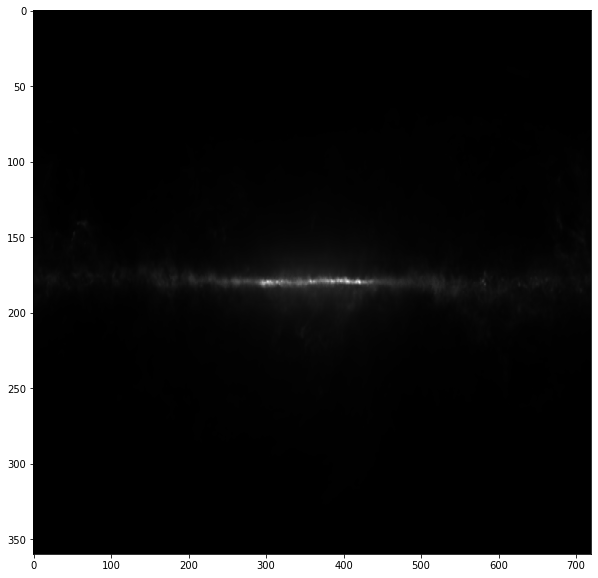

In [24]:
plt.figure(figsize = (10,10))
plt.imshow(x1,vmin=minval,vmax=maxval,cmap='gray',aspect='auto')


In [15]:
stack=img_data[:][:][4]
for i in range(9,30,5):
    stack+=img_data[:][:][i]

In [16]:
stack_minval=np.min(stack)
stack_maxval=np.max(stack)
stack_stddev=np.std(stack)

print('minvalue=',minval)
print('maxvalue=',maxval)
print('standard deviation=',stddev)


minvalue= 7.027717e-08
maxvalue= 4.5921523e-05
standard deviation= 1.3843595e-06


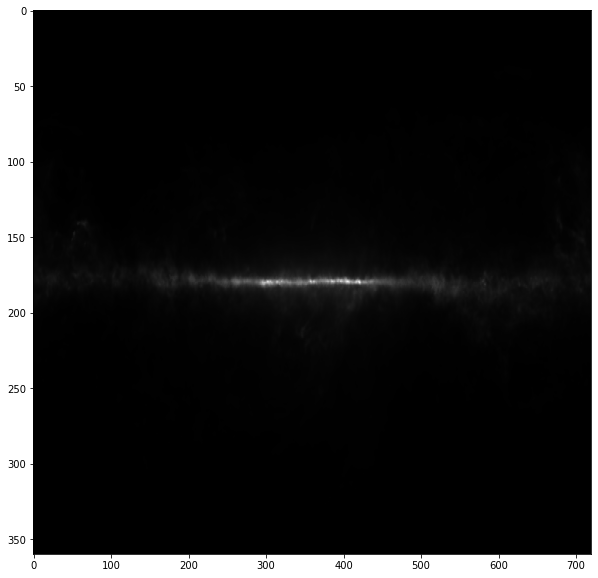

In [26]:
plt.figure(figsize = (10,10))
plt.imshow(stack,vmin=stack_minval,vmax=stack_maxval,cmap='gray',aspect='auto')

In [33]:
from astropy import units as u
from astropy.coordinates import SkyCoord,EarthLocation,AltAz
from astropy.time import Time

def altplot(coords: EarthLocation, time: Time):
    iitm= EarthLocation(lat=12.992*u.deg, lon=80.234*u.deg, height=50*u.m)
    time+=6.5*u.hour
    coords_altaz=coords.transform_to(AltAz(obstime=time, location=iitm))
    print(coords_altaz.alt)
    